2025-05-26 17:10:28.263259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748279428.463109      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748279428.521562      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


I0000 00:00:1748279442.757975      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1748279442.758639      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1748279452.815141     111 service.cc:148] XLA service 0x7f12ac113720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748279452.815955     111 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748279452.815976     111 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748279453.691085     111 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/54 ━━━━━━━━━━━━━━━━━━━━ 10:48 12s/step - accuracy: 0.1875 - loss: 2.0818

I0000 00:00:1748279458.132805     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 720ms/step - accuracy: 0.7681 - loss: 0.7122 - val_accuracy: 0.9535 - val_loss: 0.1472
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 433ms/step - accuracy: 0.9545 - loss: 0.1259 - val_accuracy: 0.9628 - val_loss: 0.0986
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 432ms/step - accuracy: 0.9611 - loss: 0.1119 - val_accuracy: 0.9651 - val_loss: 0.1059
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 438ms/step - accuracy: 0.9512 - loss: 0.1246 - val_accuracy: 0.9698 - val_loss: 0.1058
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 428ms/step - accuracy: 0.9838 - loss: 0.0670 - val_accuracy: 0.9791 - val_loss: 0.0563
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 433ms/step - accuracy: 0.9677 - loss: 0.0791 - val_accuracy: 0.9767 - val_loss: 0.0626
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 436ms/step - accuracy: 0.9779 - loss: 0.0587 - val_accuracy: 0.9767 - val_loss: 0.0670
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 426ms/step - accuracy: 0.9816 - loss: 0.0486 - val_accuracy: 0.979

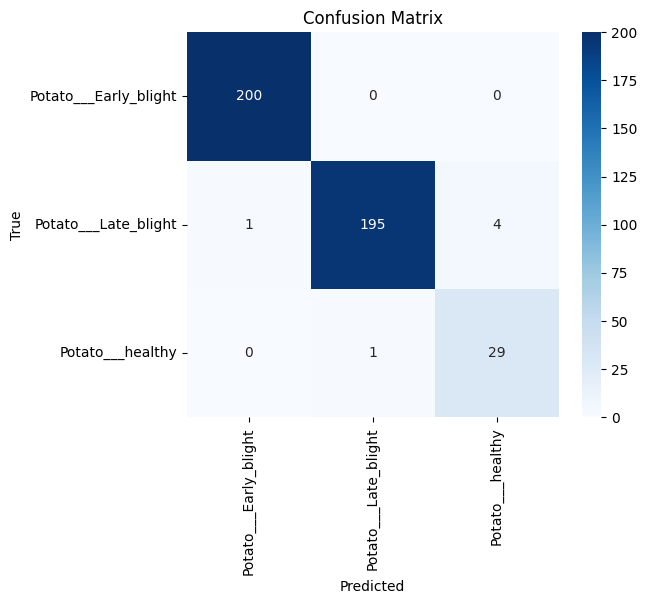

In [1]:
# 1. Imports
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 2. Define paths
dataset_path = "/kaggle/input/potato/PlantVillage"  # Adjust based on your dataset name

# 3. Set parameters
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10
CLASS_NAMES = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# 4. Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# 5. Build Model with Transfer Learning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze the base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# 7. Evaluate Model
val_generator.reset()
preds = model.predict(val_generator, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

# 8. Classification Report
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

# 9. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 10. Save Model
model.save("potato_disease_model.h5")


In [2]:
model.save("/kaggle/working/potato_disease_model.h5")

Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.

🔒 Training with frozen base layers...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 566ms/step - accuracy: 0.8040 - loss: 0.4829 - val_accuracy: 0.9581 - val_loss: 0.1156
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 425ms/step - accuracy: 0.9430 - loss: 0.1359 - val_accuracy: 0.9698 - val_loss: 0.0885
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 423ms/step - accuracy: 0.9723 - loss: 0.0855 - val_accuracy: 0.9767 - val_loss: 0.0666
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 426ms/step - accuracy: 0.9708 - loss: 0.0717 - val_accuracy: 0.9837 - val_loss: 0.0556
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 424ms/step - accuracy: 0.9713 - loss: 0.0717 - val_accuracy: 0.9721 - val_loss: 0.0757
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 431ms/step - accuracy: 0.9747 - loss: 0.0649 - val_accuracy: 0.9791 - val_loss: 0.0501
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 422ms/step - accuracy: 0.9780 - loss: 0.0587 - val_accuracy: 0.9744 - val_loss: 0.0570
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 425ms/step - accuracy: 0.9855 - loss: 0.0437 - val_accu

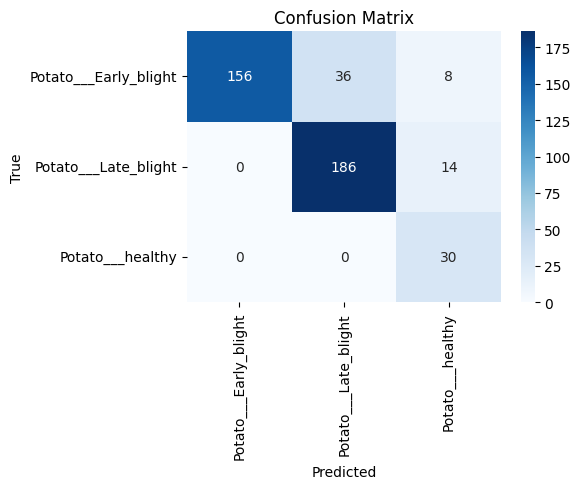


✅ Model saved as potato_disease_model.h5


In [3]:
# 1. Imports
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 2. Define paths
dataset_path = "/kaggle/input/potato/PlantVillage"  # Make sure this path contains only 3 folders

# 3. Set parameters
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS_FROZEN = 10
EPOCHS_FINE_TUNE = 10
CLASS_NAMES = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# 4. Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# 5. Build Model with Transfer Learning
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze the base initially

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train Model (Frozen base)
print("\n🔒 Training with frozen base layers...")
history_frozen = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS_FROZEN
)

# 7. Unfreeze base_model for fine-tuning
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# 8. Continue Training (Fine-tuning)
print("\n🔓 Fine-tuning with unfrozen base layers...")
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS_FINE_TUNE
)

# 9. Evaluate Model
val_generator.reset()
preds = model.predict(val_generator, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes

# 10. Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

# 11. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 12. Save Model
model.save("potato_disease_model-freeze.h5")
print("\n✅ Model saved as potato_disease_model.h5")
